In [2]:
import polars as pl
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from tqdm import tqdm

import polars.selectors as cs
import wandb

from atma_16.dataset.dataset import AtmaData16Loader

exp_name = "903_cd_matrix"
input_dir = Path("../input")
output_dir = Path("../output") / exp_name
output_dir.mkdir(parents=True, exist_ok=True)

dl = AtmaData16Loader(input_dir=input_dir)
label = dl.load_train_label()

In [8]:
from atma_16.utils.polars_utils import over_rank

cols = ["yad_no", "wid_cd", "ken_cd", "lrg_cd", "sml_cd"]
yado_df = dl.load_yado()[cols]
cd_col = "lrg_cd"

dl = AtmaData16Loader(input_dir=input_dir)

def attach_double_cd()

def create_log_w_cd(log, cd_col):
    last_log = dl.load_train_log().group_by("session_id").tail(1)
    log_w_cd = (
        last_log.join(label, on="session_id", how="inner")
        .drop("fold")
        .join(yado_df, on="yad_no", how="left")
        .join(yado_df, left_on="yad_no_right", right_on="yad_no", how="left")
    ).select(pl.col(["session_id", "yad_id", cd_col, f"{cd_col}_right"]))
    return log_w_cd


co_cd_df = (
    log_w_cd.group_by([cd_col, f"{cd_col}_right"])
    .agg(pl.count())
    .with_columns((pl.col("count") / pl.col("count").sum().over(cd_col)).alias("ratio"))
    .with_columns(over_rank("ratio", cd_col).alias("rank"))
    .sort([cd_col, "rank"])
)
# sns.heatmap(
#     co_cd_df.pivot(columns=cd_col, index=f"{cd_col}_right", values="ratio")
#     .fill_null(0)
#     .sort(f"{cd_col}_right")
#     .drop(f"{cd_col}_right"),
#     robust=True,
#     vmax=0.1,
# )
out_last_log = (
    dl.load_train_log()
    .group_by("session_id")
    .tail(1)
    .seq("seq_no")
    .join(yado_df, on="yad_no", how="left")
    .join(yado_df, on="yad_no", how="left")
    .select(pl.col(["session_id", "yad_id", cd_col]))
)
out_last_log


# log_w_cd = .join(dl.load_yado()[cols], on="yad_no", how="left")
# log_w_cd.group_by([])


# df

session_id,seq_no,yad_no
i64,i64,i64
107227,1,3414
264136,0,7691
61609,2,532
85734,0,6555
267280,2,2053
89146,3,7551
56631,0,11321
90709,0,4647
75644,0,583


In [10]:
log_w_cd

session_id,seq_no,yad_no,yad_no_right,wid_cd,ken_cd,lrg_cd,sml_cd,wid_cd_right,ken_cd_right,lrg_cd_right,sml_cd_right
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,2395,4101,8,31,164,293,8,31,164,293
1,0,13535,8253,6,10,73,88,6,10,73,88
2,0,123,4863,2,2,89,99,2,2,89,99
3,0,8475,1652,2,3,21,349,2,3,21,21
4,1,898,96,10,19,76,82,10,19,76,82
5,0,6868,4823,3,45,153,185,3,45,153,313
6,0,8602,10378,3,13,95,109,3,13,95,109
7,0,13106,10362,8,31,56,58,8,31,56,58
8,0,12062,1227,9,16,198,259,9,16,198,259


<Axes: xlabel='rank', ylabel='Count'>

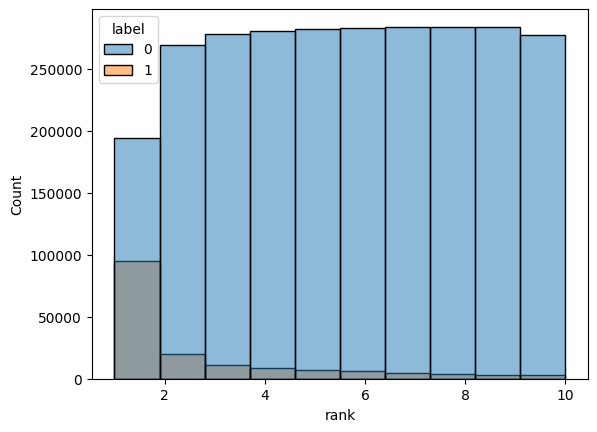

In [10]:
sns.histplot(data=oof_df.to_pandas(), hue="label", x="rank", bins=10)

<Axes: xlabel='score', ylabel='Count'>

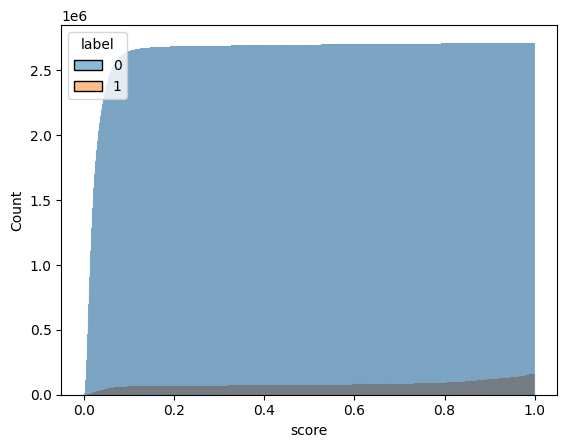

In [13]:
sns.histplot(data=oof_df.to_pandas(), hue="label", x="score", cumulative=True)